# Bakery Sales

### Objective: Find information about the most popular item(s) sold and use this knowledge in our advertising. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1014]:
df = pd.read_csv('Bakery.csv', parse_dates=['DateTime'])

In [1016]:
# create month column for graphs later
df['Month'] = df['DateTime'].dt.month_name()

In [1017]:
# where coffee is purchased grouped by months
coffee_months = df.loc[df['Items']=='Coffee'].groupby(df['Month']).count()

In [1018]:
# put months in order we can graph them
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [1019]:
coffee_months = coffee_months.reindex(new_order)

<AxesSubplot: xlabel='Month'>

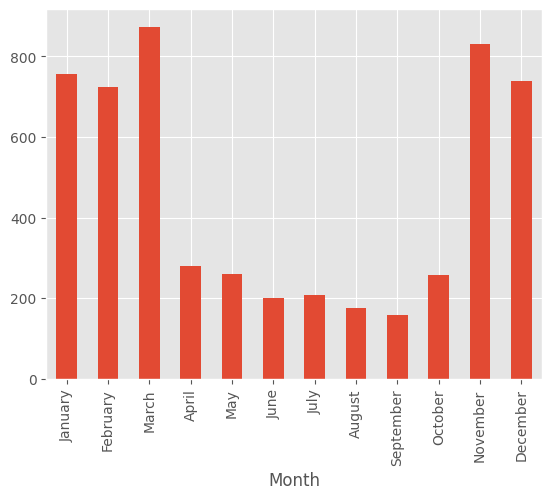

In [1020]:
# number of coffee transactions by month
coffee_months['TransactionNo'].plot(kind='bar')

In [1022]:
df['Items'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Items, Length: 94, dtype: int64

In [1023]:
value_counts = df['Items'].value_counts(normalize=True)*100

In [147]:
# remove items that make up less than 2.5 percent of distribution
remove = value_counts[value_counts<2.5].index

In [148]:
df = df[~df['Items'].isin(remove)]

In [1024]:
df['Items'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Items, Length: 94, dtype: int64

In [1025]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Month
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,October
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,October
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,October
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,October
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,October


df['Items'].value_counts().plot(kind='barh')

Text(0, 0.5, 'Item')

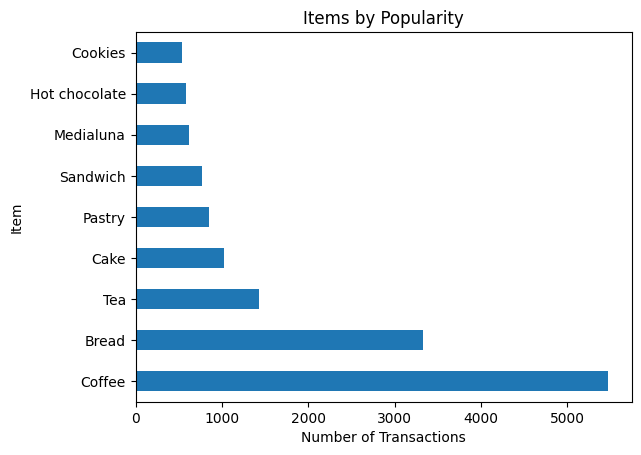

In [157]:
# Distribution of items that make up over 2.5 % of transactions
df['Items'].value_counts().plot(kind='barh')
plt.title('Items by Popularity')
plt.xlabel('Number of Transactions')
plt.ylabel('Item')

In [1026]:
df['Daypart'].value_counts()

Afternoon    11569
Morning       8404
Evening        520
Night           14
Name: Daypart, dtype: int64

In [1027]:
df['DayType'].value_counts()

Weekday    12807
Weekend     7700
Name: DayType, dtype: int64

In [1028]:
# top 3 most popular items
top3 = df['Items'].value_counts().head(3).index

In [1029]:
# make new dataframes sorting WEEKDAY and WEEKEND and in TOP3
week_mornings = df[(df['Daypart']=='Morning') & (df['DayType']=='Weekday') & (df['Items'].isin(top3))]
week_afternoons = df[(df['Daypart']=='Afternoon') & (df['DayType']=='Weekday') & (df['Items'].isin(top3))]
week_evenings = df[(df['Daypart']=='Evening') & (df['DayType']=='Weekday') & (df['Items'].isin(top3))]

weekend_mornings = df[(df['Daypart']=='Morning') & (df['DayType']=='Weekend') & (df['Items'].isin(top3))]
weekend_afternoons = df[(df['Daypart']=='Afternoon') & (df['DayType']=='Weekend') & (df['Items'].isin(top3))]
weekend_evenings = df[(df['Daypart']=='Evening') & (df['DayType']=='Weekend') & (df['Items'].isin(top3))]



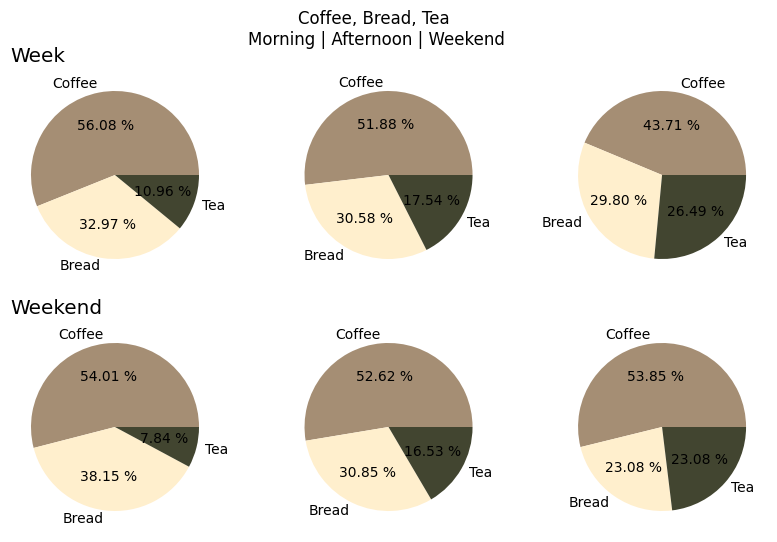

In [705]:
# pie charts for top 3 items
labels = ['Coffee', 'Bread', 'Tea']

fig = plt.figure(figsize=(10,6))
plt.suptitle('Coffee, Bread, Tea \nMorning | Afternoon | Weekend')
colors=['#a58e74', '#ffefcd', '#424530']


# week mornings
ax1 = fig.add_subplot(2,3,1)

ax1.set_title('Week', loc='left')

ax1 = plt.pie([week_mornings.loc[week_mornings['Items']=='Coffee'].count()[0],
        week_mornings.loc[week_mornings['Items']=='Bread'].count()[0],
        week_mornings.loc[week_mornings['Items']=='Tea'].count()[0]], labels=labels, autopct='%.2f %%', colors=colors)

# week afternoons

ax2, fig.add_subplot(2,3,2)

ax2 = plt.pie([week_afternoons.loc[week_afternoons['Items']=='Coffee'].count()[0],
        week_afternoons.loc[week_afternoons['Items']=='Bread'].count()[0],
        week_afternoons.loc[week_afternoons['Items']=='Tea'].count()[0]], labels=labels, autopct='%.2f %%', colors=colors)

# week evenings

ax3 = fig.add_subplot(2,3,3)

plt.pie([week_evenings.loc[week_evenings['Items']=='Coffee'].count()[0],
        week_evenings.loc[week_evenings['Items']=='Bread'].count()[0],
        week_evenings.loc[week_evenings['Items']=='Tea'].count()[0]], labels=labels, autopct='%.2f %%', colors=colors)

# weekend mornings 

ax4 = fig.add_subplot(2,3,4)

ax4.set_title('Weekend', loc='left')

ax4 = plt.pie([weekend_mornings.loc[weekend_mornings['Items']=='Coffee'].count()[0],
        weekend_mornings.loc[weekend_mornings['Items']=='Bread'].count()[0],
        weekend_mornings.loc[weekend_mornings['Items']=='Tea'].count()[0]], labels=labels, autopct='%.2f %%',colors=colors)

# weekend afternoons

ax5 = fig.add_subplot(2,3,5)

ax5 = plt.pie([weekend_afternoons.loc[weekend_afternoons['Items']=='Coffee'].count()[0],
        weekend_afternoons.loc[weekend_afternoons['Items']=='Bread'].count()[0],
        weekend_afternoons.loc[weekend_afternoons['Items']=='Tea'].count()[0]], labels=labels, autopct='%.2f %%',colors=colors)

# weekend evenings

ax6 = fig.add_subplot(2,3,6)


ax6 = plt.pie([weekend_evenings.loc[weekend_evenings['Items']=='Coffee'].count()[0],
        weekend_evenings.loc[weekend_evenings['Items']=='Bread'].count()[0],
        weekend_evenings.loc[weekend_evenings['Items']=='Tea'].count()[0]], labels=labels, autopct='%.2f %%',colors=colors)




plt.show()

In [1262]:
df.shape

(20507, 6)

### conclusions

If we observe this data while keeping in mind the fact that many people work 9-5, it brings us somewhat obvious conclusions.

We see there is a significantly low amount of coffee sales on week evenings. This makes sense as evening coffee can  disrupt sleep, and many people avoid it in the late hours of the day. This could explain the higher tea sales during these hours. (Tea generally has less caffeine).

We also see there is a high amount of bread sold on weekend mornings. It may be reasonable to infer that these buyers are coming in for coffee, and buying bread while they are out. (Many people grocery shop on weekends, they may be choosing to support their local bakery by by choosing to buy bread here rather than a big box store. To test this, we will look at how many customers who bought bread and also brought coffee, for each of the 6 time periods above. 

### which items are the most common items people buy with coffee? we can take advantage of this in our advertising

In [1326]:
# join items with same TransactionNo
df['complete order'] = df.groupby('TransactionNo')['Items'].transform(lambda x: ','.join(x))

In [1327]:
# as we can see we have rows that share TransactionNo (like rows 3 and 4)
df.head(5)

,TransactionNo,Items,DateTime,Daypart,DayType,Month,complete order
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,October,Bread
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,October,"Scandinavian,Scandinavian"
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,October,"Scandinavian,Scandinavian"
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,October,"Hot chocolate,Jam,Cookies"
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,October,"Hot chocolate,Jam,Cookies"


In [1328]:
# we drop those so we can have one TransactionNo per row
new_df = df.drop_duplicates(subset=['TransactionNo'],keep='first')

In [1329]:
# we see the change here
new_df.head(10)

,TransactionNo,Items,DateTime,Daypart,DayType,Month,complete order
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,October,Bread
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,October,"Scandinavian,Scandinavian"
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,October,"Hot chocolate,Jam,Cookies"
6,4,Muffin,2016-10-30 10:08:41,Morning,Weekend,October,Muffin
7,5,Coffee,2016-10-30 10:13:03,Morning,Weekend,October,"Coffee,Pastry,Bread"
10,6,Medialuna,2016-10-30 10:16:55,Morning,Weekend,October,"Medialuna,Pastry,Muffin"
13,7,Medialuna,2016-10-30 10:19:12,Morning,Weekend,October,"Medialuna,Pastry,Coffee,Tea"
17,8,Pastry,2016-10-30 10:20:51,Morning,Weekend,October,"Pastry,Bread"
19,9,Bread,2016-10-30 10:21:59,Morning,Weekend,October,"Bread,Muffin"
21,10,Scandinavian,2016-10-30 10:25:58,Morning,Weekend,October,"Scandinavian,Medialuna"


In [1330]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Month,complete order
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,October,Bread
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,October,"Scandinavian,Scandinavian"
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,October,"Scandinavian,Scandinavian"
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,October,"Hot chocolate,Jam,Cookies"
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,October,"Hot chocolate,Jam,Cookies"


In [1331]:
# here we look at the most common orders that include coffee

containing_coffee = new_df.loc[new_df['complete order'].str.contains('Coffee')]['complete order'].value_counts()
containing_coffee

# we want to ignore the first because those are just solo coffee orders
# we see that the most popular item bought with coffee is a second coffee

Coffee                                                                   1008
Coffee,Coffee                                                             177
Coffee,Bread                                                              141
Coffee,Pastry                                                              89
Bread,Coffee                                                               87
                                                                         ... 
Hot chocolate,Hot chocolate,Coffee,Cookies,Medialuna                        1
Medialuna,Tea,Coffee,Coffee                                                 1
Hot chocolate,Coffee,Coffee,Tea,Cake,Cake,Medialuna,Pastry,Farm House       1
Coffee,Hot chocolate,Sandwich                                               1
Muffin,Tacos/Fajita,Coffee,Tea                                              1
Name: complete order, Length: 1564, dtype: int64

In [1338]:
# to chart this out
for items in containing_coffee.index[1:11]:
    print(items)

Coffee,Coffee
Coffee,Bread
Coffee,Pastry
Bread,Coffee
Coffee,Cake
Coffee,Medialuna
Coffee,Toast
Coffee,Sandwich
Coffee,Tea
Coffee,Cookies


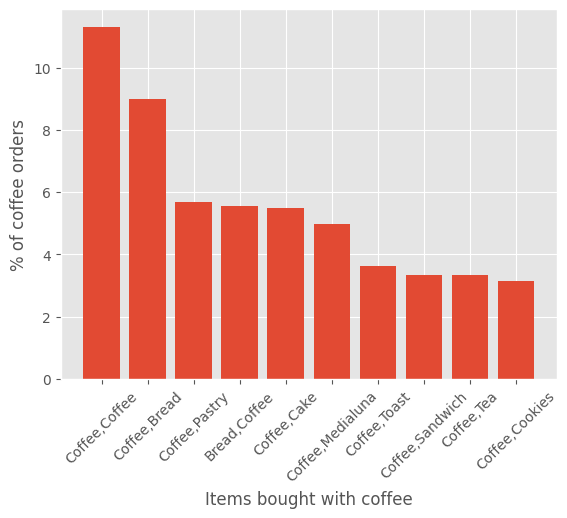

In [1354]:
plt.bar(containing_coffee.index[1:11], containing_coffee[1:11]/containing_coffee.shape[0]*100)
plt.xticks(rotation=45)
plt.xlabel('Items bought with coffee')
plt.ylabel('% of coffee orders')
plt.show()

## Analysis

We see that coffee is the most popular item purchased with coffee. This may infer that this bakery is a hot spot for coffee dates. We could test an ad that targets this, maybe giving a discount on a second coffee. (Especially around holidays when couples are spending more time together.

However, we could also conclude that customers come in to buy coffee for their coworkers while they're buying coffee for themselves. (Coffee sales are highest on week mornings, and many people work on week mornings.) We could test an ad targeting this. Maybe we use a headline like "Help your coworker start the day right. Get a second cup of coffee free." 

The data also shows that bread is the second most popular item to buy with coffee. It is likely that customers come to the bakery to buy bread (highest bread sales on weekend mornings) and decide to buy coffee with it while they are in the store. Since we know customers like to buy coffee when they buy bread, we could offer a discount on coffee if a customer buys two loaves of bread on a Saturday or Sunday morning. (Bread likely sells for more than coffee and it may be worth the coffee discount if it means we sell two loaves of bread.)